In [ ]:
# !pip install underthesea
# !pip install demoji
# !pip install pyvi

In [ ]:
# !apt update
# !apt-get install openjdk-11-jdk-headless -qq > /dev/null
# !wget -q http://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
# !tar -xvf spark-3.3.0-bin-hadoop3.tgz
# !pip install -q findspark
# import os
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"

In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)

# %cd '/content/gdrive/My Drive/Data_Sicience/LDS0_K282_ONLINE_LuuNguyenKhaiHoan/Project_1/Data/'

In [ ]:
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

In [1]:
%cd "Data"

C:\Users\khaih\Downloads\LDS0\Data


In [2]:
import pandas as pd
import numpy as np
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import demoji
from pyvi import ViPosTagger, ViTokenizer
import string

In [3]:
##LOAD EMOJICON
file = open('files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()
#################
#LOAD TEENCODE
file = open('files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
################
#LOAD wrong words
file = open('files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()
#################
#LOAD STOPWORDS
file = open('files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [4]:
def process_text(text, emoji_dict, teen_dict, wrong_lst):
    document = text.lower()
    document = document.replace("’",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # if not(sentence.isascii()):
        ###### CONVERT EMOJICON
        sentence = ''.join(emoji_dict[word]+' ' if word in emoji_dict else word for word in list(sentence))
        ###### CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        ###### DEL wrong words   
        sentence = ' '.join('' if word in wrong_lst else word for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '                    
    document = new_sentence  
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [5]:
# Chuẩn hóa unicode tiếng việt
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [6]:
# có thể bổ sung thêm các từ: chẳng, chả...
def process_special_word(text):
    new_text = ''
    text_lst = text.split()
    i= 0
    if 'không' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == 'không':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                    #print(word)
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    elif 'tạm' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
#             print(word)
#             print(i)
            if  word == 'tạm':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]

                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
            #print(new_text)
    elif 'hơi' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'hơi':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
#                     print(word)
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
            #print(new_text)
#     elif 'chất_lượng' in text_lst:
#         while i <= len(text_lst) - 1:
#             word = text_lst[i]
#             if  word == 'chất_lượng':
#                 next_idx = i+1
#                 if next_idx <= len(text_lst) -1:
#                     word = word +'_'+ text_lst[next_idx]
#                 i= next_idx + 1
#             else:
#                 i = i+1
#             new_text = new_text + word + ' '
            #print(new_text)
    elif 'quá' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'quá':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
            #print(new_text)
    elif 'giao' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'giao':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
            #print(new_text)
    elif 'khá' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'khá':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
            #print(new_text)
    elif 'hơn' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            if  word == 'hơn':
                back_idx = i-1
                if back_idx >=1:
                    cache=text_lst[back_idx]
                    new_text=new_text.replace(cache, '')
#                     print(new_text)
#                     print(text_lst)
                    word =  cache+'_'+ word
                    #print(text_lst)
                i= back_idx + 2
            else:
                i = i+1
            #print(word)
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()

In [7]:
def xu_li_text(word,lst_word_type,lst_word_type_special):
    if (word[1].upper() in lst_word_type) and word[0]!="chất_lượng":
        return word[0]
    elif (word[1].upper() in lst_word_type_special) and word[0]=="chất_lượng":
        return word[0]
    else:
        return ""

In [8]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['A','AB','VB','VY','R','M','Nu','V','N','NP']
        lst_word_type_special= ['A','AB','VB','VY','R','M','Nu']
        #lst_word_type = ['A','AB','V','VB','VY','R']
        sentence = ' '.join(xu_li_text(word,lst_word_type,lst_word_type_special) for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [9]:
def remove_stopword(text, stopwords):
    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [ ]:
# text="sản phẩm chất lượng"

In [ ]:
# pos_tag(process_special_word(word_tokenize(text, format="text")))

In [ ]:
# document = text
# document=  process_text(document,emoji_dict,teen_dict,wrong_lst)
# document = convert_unicode(document)
# document = process_postag_thesea(document)
# #document = pos_tag(process_special_word(word_tokenize(document, format="text")))
# document = remove_stopword(document, stopwords_lst)
# document

In [ ]:
# pos_tag('hơi_mỏng')

In [ ]:
# %cd '/content/gdrive/My Drive/Data_Sicience/LDS0_K282_ONLINE_LuuNguyenKhaiHoan/Project_1/Data/'

In [10]:
import pyspark

In [11]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import length

from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.ml.feature import CountVectorizer, IDF, StringIndexer, VectorIndexer
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import LogisticRegression, LinearSVC
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector
from pyspark.sql.functions import col, lit
import pyspark.sql.functions as F

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib

Large_SIZE = 50
matplotlib.rc('axes', titlesize=Large_SIZE)

In [12]:
import pandas as pd
data = pd.read_csv("Products_Shopee_comments.csv", delimiter=',')

In [13]:
data.head()

product_id               category     sub_category                user  \
0          32  Điện Thoại & Phụ Kiện  Bảo vệ màn hình            sangth63   
1          32  Điện Thoại & Phụ Kiện  Bảo vệ màn hình  truongthinga260787   
2          32  Điện Thoại & Phụ Kiện  Bảo vệ màn hình             n*****0   
3          32  Điện Thoại & Phụ Kiện  Bảo vệ màn hình           hoanhq123   
4          32  Điện Thoại & Phụ Kiện  Bảo vệ màn hình         vanguyen411   

   rating                                            comment  
0       3  Miếng dán hơi dầy ko thẩm mỹ. Qan trong là ko ...  
1       3  Mua nhiều miếng dán ở shop rồi, nhưng thật sự ...  
2       3                                                NaN  
3       3                                                NaN  
4       2  Giao sai sp, đặt 1 cường lực trắng cho 8+ nhưn...

In [14]:
cols=data.category.unique()
count_data=data.groupby("category")[["product_id","comment"]].count()

In [15]:
count_data.head(10)

product_id  comment
category                                    
Máy Tính & Laptop             14820    10471
Máy Ảnh & Máy Quay Phim        5251     3659
Mẹ & Bé                      104958    74865
Nhà Cửa & Đời Sống            18357    11853
Sắc Đẹp                        1261      871
Thiết Bị Điện Tử              17129    10772
Thời Trang Nam              1041870   537950
Thời Trang Nữ                584108   229628
Điện Thoại & Phụ Kiện         97403    61233

In [16]:
for col in count_data.index:
    print(col,":")
    print("\t- Số lượng dữ liệu:", count_data.loc[col]["product_id"],"dòng")
    print("\t- Số lượng dữ liệu không null:", count_data.loc[col]["comment"],"dòng")

Máy Tính & Laptop :
	- Số lượng dữ liệu: 14820 dòng
	- Số lượng dữ liệu không null: 10471 dòng
Máy Ảnh & Máy Quay Phim :
	- Số lượng dữ liệu: 5251 dòng
	- Số lượng dữ liệu không null: 3659 dòng
Mẹ & Bé :
	- Số lượng dữ liệu: 104958 dòng
	- Số lượng dữ liệu không null: 74865 dòng
Nhà Cửa & Đời Sống :
	- Số lượng dữ liệu: 18357 dòng
	- Số lượng dữ liệu không null: 11853 dòng
Sắc Đẹp :
	- Số lượng dữ liệu: 1261 dòng
	- Số lượng dữ liệu không null: 871 dòng
Thiết Bị Điện Tử :
	- Số lượng dữ liệu: 17129 dòng
	- Số lượng dữ liệu không null: 10772 dòng
Thời Trang Nam :
	- Số lượng dữ liệu: 1041870 dòng
	- Số lượng dữ liệu không null: 537950 dòng
Thời Trang Nữ :
	- Số lượng dữ liệu: 584108 dòng
	- Số lượng dữ liệu không null: 229628 dòng
Điện Thoại & Phụ Kiện :
	- Số lượng dữ liệu: 97403 dòng
	- Số lượng dữ liệu không null: 61233 dòng


In [17]:
# sub_data = data[(data["category"]=="Thời Trang Nam")|(data["category"]=="Máy Tính & Laptop")| (data["category"]=="Máy Ảnh & Máy Quay Phim")][["comment","rating"]]
sub_data = data[(data["category"]=="Thời Trang Nam")][["comment","rating"]]

In [18]:
sub_data.head(10)

comment  rating
259179  chưa ktra nên chưa biết đc đứa nào cũng đc như...       5
259180  Lời đầu tiên cho phép được xin vì sự sơ suất c...       5
259181  1m6 50kg size M khá vừa vặn nhưng hok có cơ nê...       5
259182  Lần đầu mua shop, vải cũg khá ok. hợp vs mùa h...       5
259183  áo đẹp form đẹp, mọi thứ đều ok, giao hàng nha...       5
259184  Áo rất là đẹp nha, chất lượng dày dặn,\n giao ...       5
259185  một mét sáu mươi lăm ki lô gờ ram, nặng 65 mét...       5
259186  Ko sao em không biết làm sao ko nhỉ em quên ấy...       5
259187  Không có gì để chê cả sản phẩm tốt đẹp hợp giá...       5
259188  Nhận hàng gói rất gọn gàng . Chất vải đẹp . Fo...       5

In [19]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041870 entries, 259179 to 1319048
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   comment  537950 non-null   object
 1   rating   1041870 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 23.8+ MB


In [20]:
sub_data=sub_data.dropna()

In [21]:
sub_data.count()

comment    537950
rating     537950
dtype: int64

In [22]:
sub_data.duplicated().sum()

197275

In [23]:
def func_class(s):
    if s>3:
        return "Like"
    elif s<=2:
        return "Not_Like"
    return "Neutral"

sub_data["class"]=sub_data["rating"].apply(lambda x: func_class(x))

In [24]:
sub_data.head()

comment  rating class
259179  chưa ktra nên chưa biết đc đứa nào cũng đc như...       5  Like
259180  Lời đầu tiên cho phép được xin vì sự sơ suất c...       5  Like
259181  1m6 50kg size M khá vừa vặn nhưng hok có cơ nê...       5  Like
259182  Lần đầu mua shop, vải cũg khá ok. hợp vs mùa h...       5  Like
259183  áo đẹp form đẹp, mọi thứ đều ok, giao hàng nha...       5  Like

In [25]:
wordcloud_0 = sub_data[sub_data['class'] == "Like"].drop(['class',"rating"], axis=1)
wordcloud_1 = sub_data[sub_data['class'] == "Not_Like"].drop(['class',"rating"], axis=1)
wordcloud_2 = sub_data[sub_data['class'] == "Neutral"].drop(['class',"rating"], axis=1)

In [26]:
dfs=[wordcloud_0,wordcloud_1,wordcloud_2]

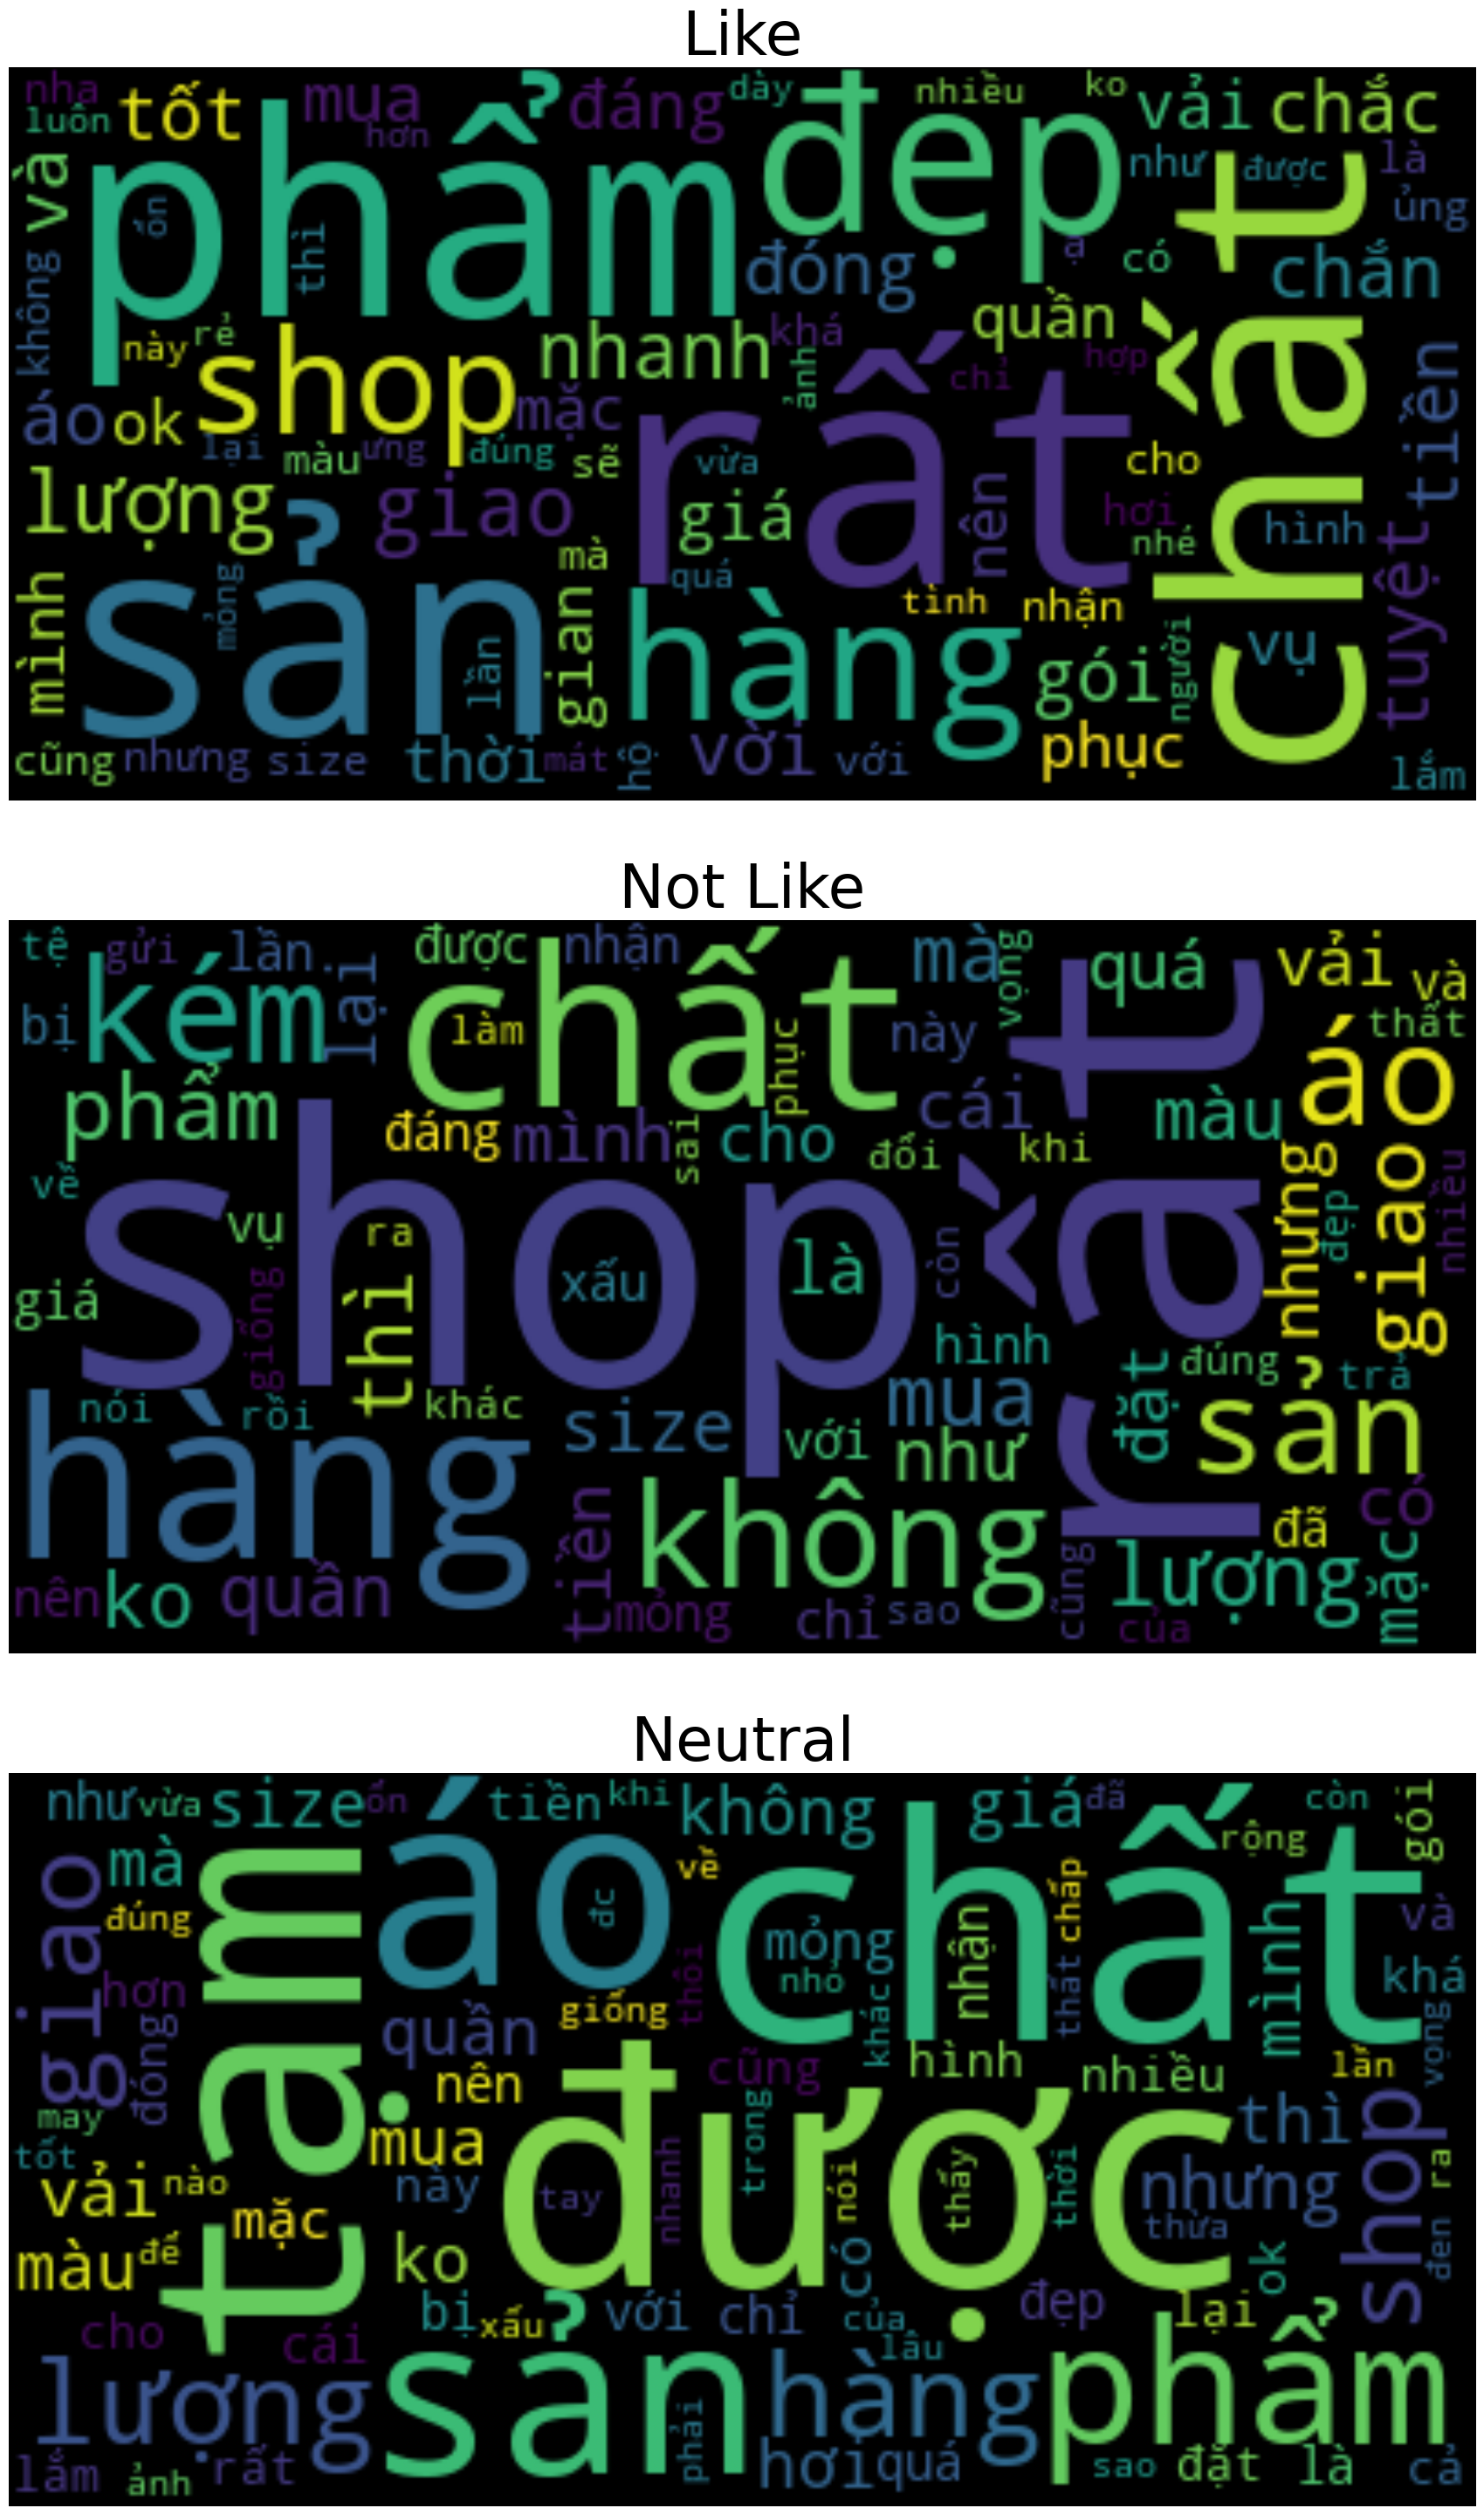

In [27]:
comment_words = ''
#stopwords = set(STOPWORDS)
plt.figure(figsize = (40, 30), facecolor = None)
j=1
for df in dfs:
    wordcloud=""
    comment_words=""
    for val in df.comment:

        val = str(val)

        tokens = val.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(background_color ='black',max_words=100,
                      min_font_size = 10,collocations=False).generate(comment_words)

    plt.subplot(len(dfs), 1, j)
    plt.imshow(wordcloud,interpolation="bilinear")
    if j-1==0:
        plt.gca().set_title('Like')
    elif j-1==1:
        plt.gca().set_title('Not Like')
    else:
        plt.gca().set_title('Neutral')
        
        

    plt.axis("off")
    plt.tight_layout(pad = 5)
    j+=1
plt.savefig("wordcloud_prefix.png", bbox_inches='tight')
plt.show()

In [28]:
import gc
gc.collect()

8475

In [29]:
pre_data_lst=[]
for row in range(len(sub_data)):
    document = sub_data.iloc[row]["comment"]
    document=  process_text(document,emoji_dict,teen_dict,wrong_lst)
    document = convert_unicode(document)
    document = process_postag_thesea(document)
    document = remove_stopword(document, stopwords_lst)
    pre_data_lst.append(document)

In [30]:
data_pre = sub_data.copy()
data_pre['pre_comment'] = pre_data_lst

In [31]:
data_pre.head()

comment  rating class  \
259179  chưa ktra nên chưa biết đc đứa nào cũng đc như...       5  Like   
259180  Lời đầu tiên cho phép được xin vì sự sơ suất c...       5  Like   
259181  1m6 50kg size M khá vừa vặn nhưng hok có cơ nê...       5  Like   
259182  Lần đầu mua shop, vải cũg khá ok. hợp vs mùa h...       5  Like   
259183  áo đẹp form đẹp, mọi thứ đều ok, giao hàng nha...       5  Like   

                                              pre_comment  
259179                                            kiểm đồ  
259180  cho_phép sơ_suất troâm nhạc hát hoạt_động nhậv...  
259181  vừa_vặn nâu trăng dày hơn đỏ trắng đỏ cổ hơn n...  
259182                                đầu_shop hợp mùa hè  
259183                                đẹp đẹp nhanh thích

In [32]:
data_pre.isnull().sum()

comment        0
rating         0
class          0
pre_comment    0
dtype: int64

In [33]:
data_pre = data_pre.drop(['comment'], axis =1)

In [34]:
data_pre.head()

rating class                                        pre_comment
259179       5  Like                                            kiểm đồ
259180       5  Like  cho_phép sơ_suất troâm nhạc hát hoạt_động nhậv...
259181       5  Like  vừa_vặn nâu trăng dày hơn đỏ trắng đỏ cổ hơn n...
259182       5  Like                                đầu_shop hợp mùa hè
259183       5  Like                                đẹp đẹp nhanh thích

In [35]:
data_pre.head(10)

rating class                                        pre_comment
259179       5  Like                                            kiểm đồ
259180       5  Like  cho_phép sơ_suất troâm nhạc hát hoạt_động nhậv...
259181       5  Like  vừa_vặn nâu trăng dày hơn đỏ trắng đỏ cổ hơn n...
259182       5  Like                                đầu_shop hợp mùa hè
259183       5  Like                                đẹp đẹp nhanh thích
259184       5  Like                                  đẹp dày_dặn nhanh
259185       5  Like                   mét sáu_mươi_lăm lô gờ fit luônn
259186       5  Like                     không_không không_nhỉ quên học
259187       5  Like                                    chê tốt_đẹp hợp
259188       5  Like         gọn_gàng đẹp ôm tôn dáng hình_ảnh kâng họa

In [36]:
data_pre = data_pre.drop(['rating'], axis =1)

In [37]:
data_pre.drop(data_pre[data_pre["pre_comment"]==""].index, axis=0, inplace=True)

In [38]:
data_pre.count()

class          526579
pre_comment    526579
dtype: int64

In [39]:
data_pre.head()

class                                        pre_comment
259179  Like                                            kiểm đồ
259180  Like  cho_phép sơ_suất troâm nhạc hát hoạt_động nhậv...
259181  Like  vừa_vặn nâu trăng dày hơn đỏ trắng đỏ cổ hơn n...
259182  Like                                đầu_shop hợp mùa hè
259183  Like                                đẹp đẹp nhanh thích

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_0 = data_pre[data_pre['class'] == "Like"].drop(['class'], axis=1)
wordcloud_1 = data_pre[data_pre['class'] == "Not_Like"].drop(['class'], axis=1)
wordcloud_2 = data_pre[data_pre['class'] == "Neutral"].drop(['class'], axis=1)

In [41]:
dfs_pre=[wordcloud_0,wordcloud_1,wordcloud_2]

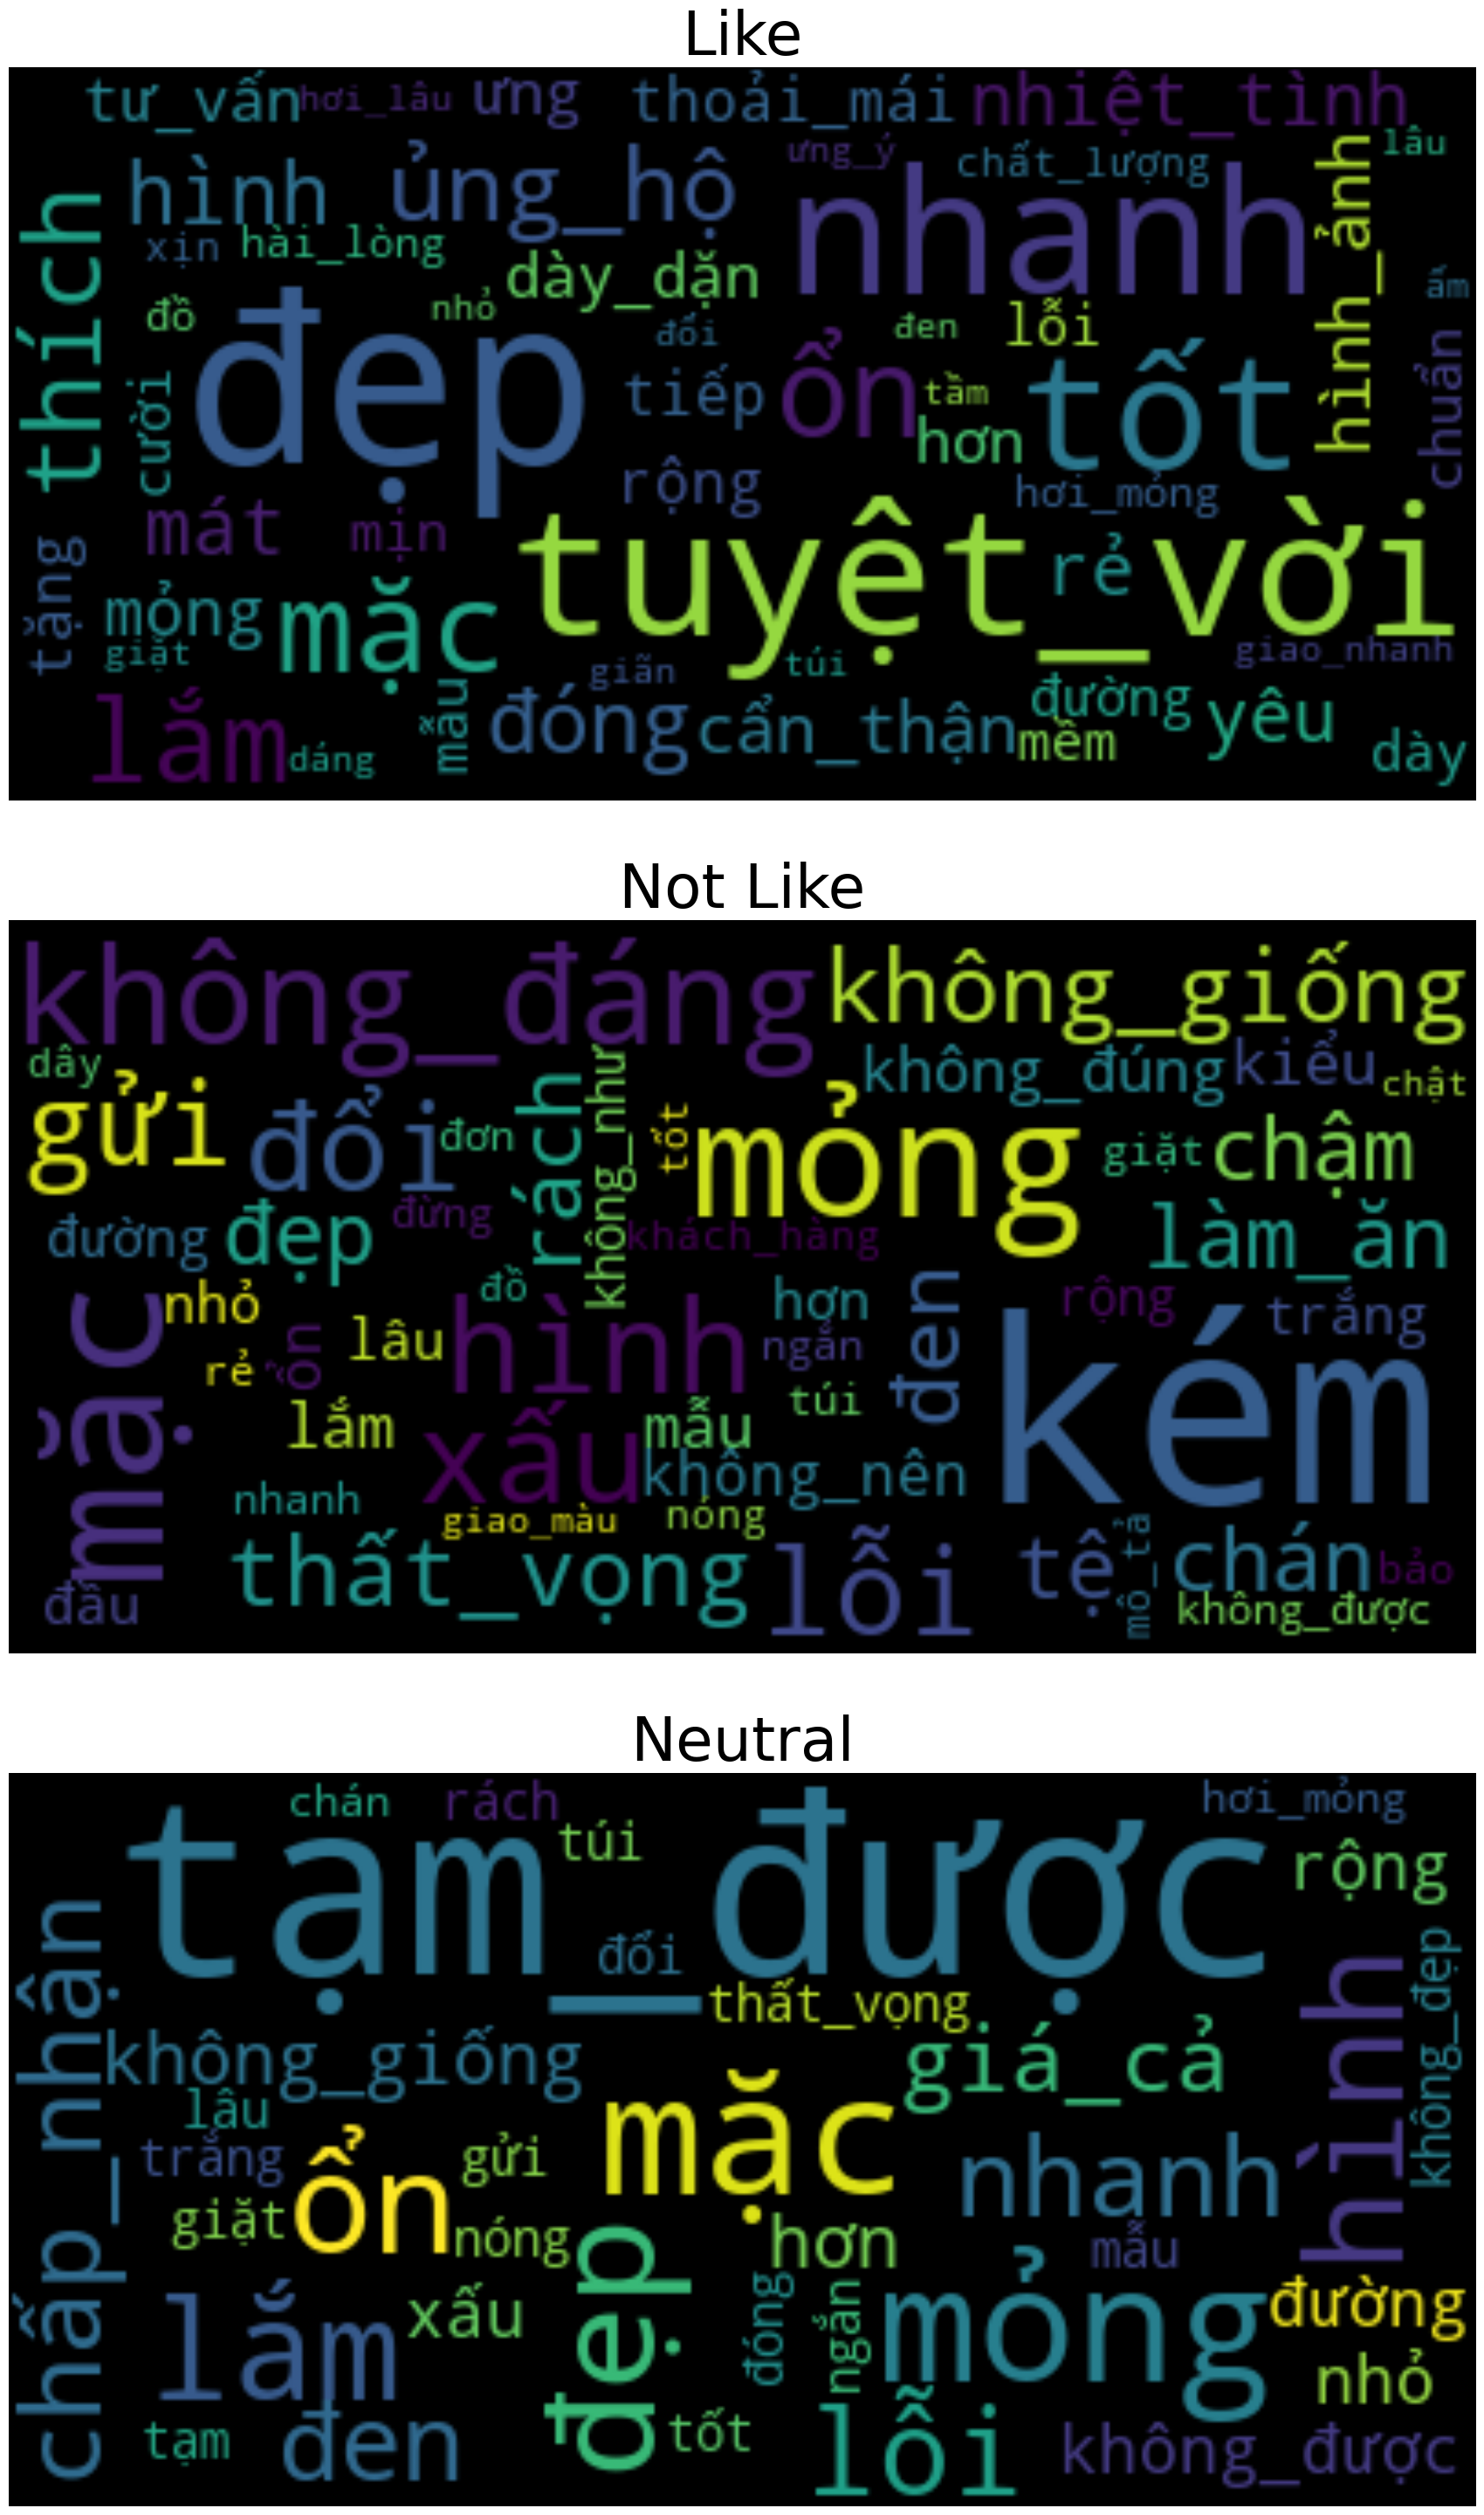

In [42]:
comment_words = ''
#stopwords = set(STOPWORDS)
plt.figure(figsize = (40, 30), facecolor = None)
j=1
for df in dfs_pre:
    wordcloud=""
    comment_words=""
    for val in df.pre_comment:

        val = str(val)

        tokens = val.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(background_color ='black',max_words=100,
                      min_font_size = 10,collocations=False).generate(comment_words)

    plt.subplot(len(dfs), 1, j)
    plt.imshow(wordcloud,interpolation="bilinear")
    if j-1==0:
        plt.gca().set_title('Like')
    elif j-1==1:
        plt.gca().set_title('Not Like')
    else:
        plt.gca().set_title('Neutral')
        
        

    plt.axis("off")
    plt.tight_layout(pad = 5)
    j+=1
plt.savefig("wordcloud_preprocessing", bbox_inches='tight')
plt.show()

In [43]:
data_pre.head()

class                                        pre_comment
259179  Like                                            kiểm đồ
259180  Like  cho_phép sơ_suất troâm nhạc hát hoạt_động nhậv...
259181  Like  vừa_vặn nâu trăng dày hơn đỏ trắng đỏ cổ hơn n...
259182  Like                                đầu_shop hợp mùa hè
259183  Like                                đẹp đẹp nhanh thích

In [44]:
data_pre.to_csv("pre_data_8.csv")

In [45]:
data_sum=data_pre.copy()

In [46]:
data_sum["count_word"]=data_sum["pre_comment"].apply(lambda x:len(x.split()))

In [47]:
data_sum.head()

class                                        pre_comment  count_word
259179  Like                                            kiểm đồ           2
259180  Like  cho_phép sơ_suất troâm nhạc hát hoạt_động nhậv...           9
259181  Like  vừa_vặn nâu trăng dày hơn đỏ trắng đỏ cổ hơn n...          19
259182  Like                                đầu_shop hợp mùa hè           4
259183  Like                                đẹp đẹp nhanh thích           4

In [48]:
print(data_sum["count_word"].max())
print(data_sum["count_word"].min())

150
1


In [49]:
data_sum.groupby("class")["count_word"].agg(["min","max"])

min  max
class             
Like        1  150
Neutral     1  102
Not_Like    1   70

In [50]:
data_sum.groupby("class").size().to_frame('counts')

counts
class           
Like      449182
Neutral    33547
Not_Like   43850